<a href="https://colab.research.google.com/github/rxg95600/Mini-Project/blob/main/ram_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries and  Import Required Modules**

In [1]:
!pip install nibabel medpy tensorflow
import os
import nibabel as nib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from medpy.filter.binary import largest_connected_component
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 16.3 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.5.2-cp310-cp310-linux_x86_64.whl size=762839 sha256=699cd59da83fb6d95d5aa377231a9113e4a9ed82697b6cc956f2565bdd0fd0ad
  Stored in directory: /root/.cache/pip/wheels/a1/b8/63/bdf557940ec60d1b8822e73ff9fbe7727ac19f009d46b5d175
Successfully built medpy


**Mount Google Drive and Extract Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp "/content/drive/MyDrive/archive.zip" /content/
!unzip "/content/archive.zip" -d /content/extracted_folder/

Archive:  /content/archive.zip
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_flair.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_seg.nii  
  inflating: /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_t1.nii  

In [6]:
!ls /content/extracted_folder/

checkpoint	      MICCAI_BraTS_2018_Data_Training
mean_std_dict.pickle  MICCAI_BraTS_2018_Data_Validation


In [7]:
!ls /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/

HGG  LGG  survival_data.csv


In [8]:
# List contents of the HGG folder
!ls /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/

# List contents of the LGG folder
!ls /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/LGG/

Brats18_2013_10_1    Brats18_CBICA_AQP_1  Brats18_CBICA_BHK_1	Brats18_TCIA02_491_1
Brats18_2013_11_1    Brats18_CBICA_AQQ_1  Brats18_CBICA_BHM_1	Brats18_TCIA02_605_1
Brats18_2013_12_1    Brats18_CBICA_AQR_1  Brats18_TCIA01_131_1	Brats18_TCIA02_606_1
Brats18_2013_13_1    Brats18_CBICA_AQT_1  Brats18_TCIA01_147_1	Brats18_TCIA02_607_1
Brats18_2013_14_1    Brats18_CBICA_AQU_1  Brats18_TCIA01_150_1	Brats18_TCIA02_608_1
Brats18_2013_17_1    Brats18_CBICA_AQV_1  Brats18_TCIA01_180_1	Brats18_TCIA03_121_1
Brats18_2013_18_1    Brats18_CBICA_AQY_1  Brats18_TCIA01_186_1	Brats18_TCIA03_133_1
Brats18_2013_19_1    Brats18_CBICA_AQZ_1  Brats18_TCIA01_190_1	Brats18_TCIA03_138_1
Brats18_2013_20_1    Brats18_CBICA_ARF_1  Brats18_TCIA01_201_1	Brats18_TCIA03_199_1
Brats18_2013_2_1     Brats18_CBICA_ARW_1  Brats18_TCIA01_203_1	Brats18_TCIA03_257_1
Brats18_2013_21_1    Brats18_CBICA_ARZ_1  Brats18_TCIA01_221_1	Brats18_TCIA03_265_1
Brats18_2013_22_1    Brats18_CBICA_ASA_1  Brats18_TCIA01_231_1	Brats18_TCIA03_

In [9]:
patient_folder = '/content/extracted_folder/MICCAI_BraTS_2018_Data_Training/patient_folder_name/'

In [10]:
!ls /content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/


Brats18_2013_10_1_flair.nii  Brats18_2013_10_1_t1ce.nii  Brats18_2013_10_1_t2.nii
Brats18_2013_10_1_seg.nii    Brats18_2013_10_1_t1.nii


**Load and Prepare Dataset**

In [13]:
def load_brats_patient(patient_folder):
    modalities = ['flair', 't1', 't1ce', 't2', 'seg']  # Use the correct names
    data = {}
    for modality in modalities:
        img_path = os.path.join(patient_folder, f"Brats18_2013_10_1_{modality}.nii")
        if os.path.exists(img_path):
            img = nib.load(img_path).get_fdata()
            data[modality] = img
        else:
            print(f"File not found: {img_path}")
    return data

# Load the patient data again
patient_folder = '/content/extracted_folder/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/'
modality_data = load_brats_patient(patient_folder)

# Check loaded modalities again
print("Loaded modalities:", modality_data.keys())


Loaded modalities: dict_keys(['flair', 't1', 't1ce', 't2', 'seg'])


**Preprocess Data**

In [14]:
def z_score_normalization(image):
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std

# Normalize each modality
for modality in modality_data.keys():
    modality_data[modality] = z_score_normalization(modality_data[modality])


In [15]:
# Create a binary mask from the segmentation map
def create_binary_mask(segmentation):
    return segmentation > 0  # Assuming 0 is background and positive values indicate tumor

# Create the binary mask
tumor_mask = create_binary_mask(modality_data['seg'])


**Visualize the Data**

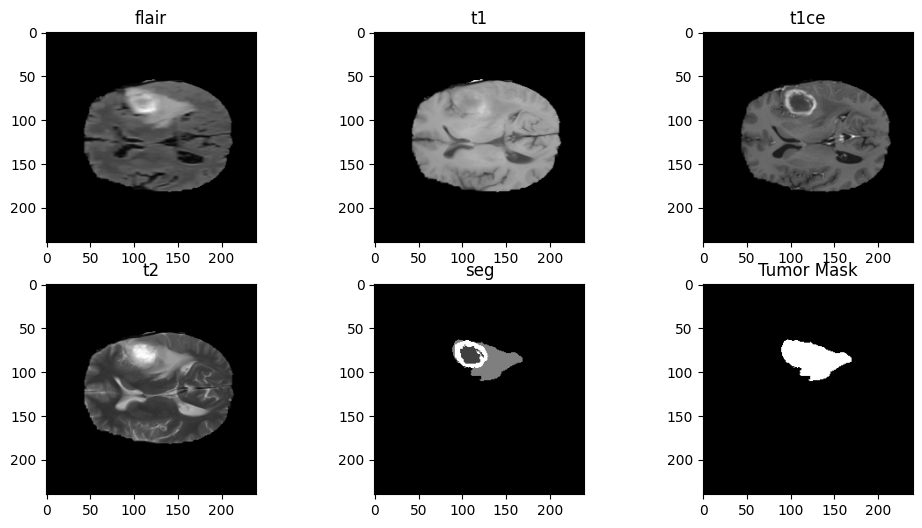

In [16]:
import matplotlib.pyplot as plt

def visualize_data(modality_data, tumor_mask):
    plt.figure(figsize=(12, 6))

    for i, (modality, img) in enumerate(modality_data.items()):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img[:, :, img.shape[2] // 2], cmap='gray')
        plt.title(modality)

    plt.subplot(2, 3, len(modality_data) + 1)
    plt.imshow(tumor_mask[:, :, tumor_mask.shape[2] // 2], cmap='gray')
    plt.title('Tumor Mask')

    plt.show()

# Visualize the data
visualize_data(modality_data, tumor_mask)


**Build and Compile the Model**

In [17]:
class DistanceWiseAttention(layers.Layer):
    def __init__(self, **kwargs):
        super(DistanceWiseAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                      initializer='glorot_uniform', trainable=True)

    def call(self, inputs):
        # Compute attention weights
        dist_weight = tf.matmul(inputs, self.kernel)  # Use matrix multiplication for attention
        attention = tf.nn.softmax(dist_weight, axis=-1)
        return attention * inputs  # Element-wise multiplication


In [18]:
def build_cascade_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Local features route
    local_conv = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)

    # Global features route
    global_conv = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(inputs)

    # Concatenate local and global features
    concat = layers.concatenate([local_conv, global_conv])

    # Additional convolution layers
    conv = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat)

    # Distance-Wise Attention Mechanism
    attention = DistanceWiseAttention()(conv)

    # Output layer for segmentation (240x240 binary mask)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(attention)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Input shape with 4 modalities
input_shape = (240, 240, 4)

# Create the model
cascade_cnn_model = build_cascade_cnn(input_shape)
cascade_cnn_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 240, 240, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 240, 240, 32)   │          1,184 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 240, 240, 64)   │          6,464 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 240, 240, 96)   │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 240, 240, 128)  │        110,720 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ distance_wise_attention   │ (None, 240, 240, 128)  │         16,384 │ conv2d_2[0][0]         │
│ (DistanceWiseAttention)   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 240, 240, 1)    │            129 │ distance_wise_attenti… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 134,881 (526.88 KB)

 Trainable params: 134,881 (526.88 KB)

 Non-trainable params: 0 (0.00 B)

**Prepare Data for Model Training and Train the Model**





In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Assuming modality_data has already been normalized
# Combine modalities if needed (here we're stacking them as channels)
X = np.stack((modality_data['flair'], modality_data['t1'], modality_data['t1ce'], modality_data['t2']), axis=-1)

# Reshape for the model input
X = X.reshape(-1, 240, 240, 4)  # Change 4 to 1 if using single modality
Y = modality_data['seg']  # Assuming this is your segmentation output
Y = (Y > 0).astype(np.float32)  # Convert segmentation mask to binary if needed
Y = Y.reshape(-1, 240, 240, 1)  # Reshape for categorical output

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Fit the generator to the training data
datagen.fit(X_train)

history = cascade_cnn_model.fit(
    datagen.flow(X_train, Y_train, batch_size=16),
    validation_data=(X_val, Y_val),
    epochs=50
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9127 - loss: 0.6862 - val_accuracy: 0.9940 - val_loss: 0.6367
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.9826 - loss: 0.5911 - val_accuracy: 0.9940 - val_loss: 0.3802
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.9856 - loss: 0.3392 - val_accuracy: 0.9940 - val_loss: 0.1585
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9848 - loss: 0.1702 - val_accuracy: 0.9940 - val_loss: 0.0740
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9843 - loss: 0.1163 - val_accuracy: 0.9940 - val_loss: 0.0540
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.9866 - loss: 0.0859 - val_accuracy: 0.9940 - val_loss: 0.0521
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.9893 - loss: 0.0686 - val_accuracy: 0.9940 - val_loss: 0.0380
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.9826 - loss: 0.0917 - val_accuracy: 0.9940 - val_loss: 0.0487
Epoch

**Evaluate the Model**

In [25]:
val_loss, val_acc = cascade_cnn_model.evaluate(X_val, Y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9940 - loss: 0.0231
Validation Loss: 0.02306702919304371, Validation Accuracy: 0.9939555525779724


**Extract files from folders**

In [28]:
!unzip "/content/drive/MyDrive/archive.zip" -d /content/extracted_files/
!ls /content/extracted_files/
!ls /content/extracted_files/MICCAI_BraTS_2018_Data_Training/
!ls /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/
!ls /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/


Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_flair.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_seg.nii  
  inflating: /content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_t1

**display slices from all MRI modalities (FLAIR, T1, T1ce, T2, and the segmentation) along with the overlay of the detected tumor mask**

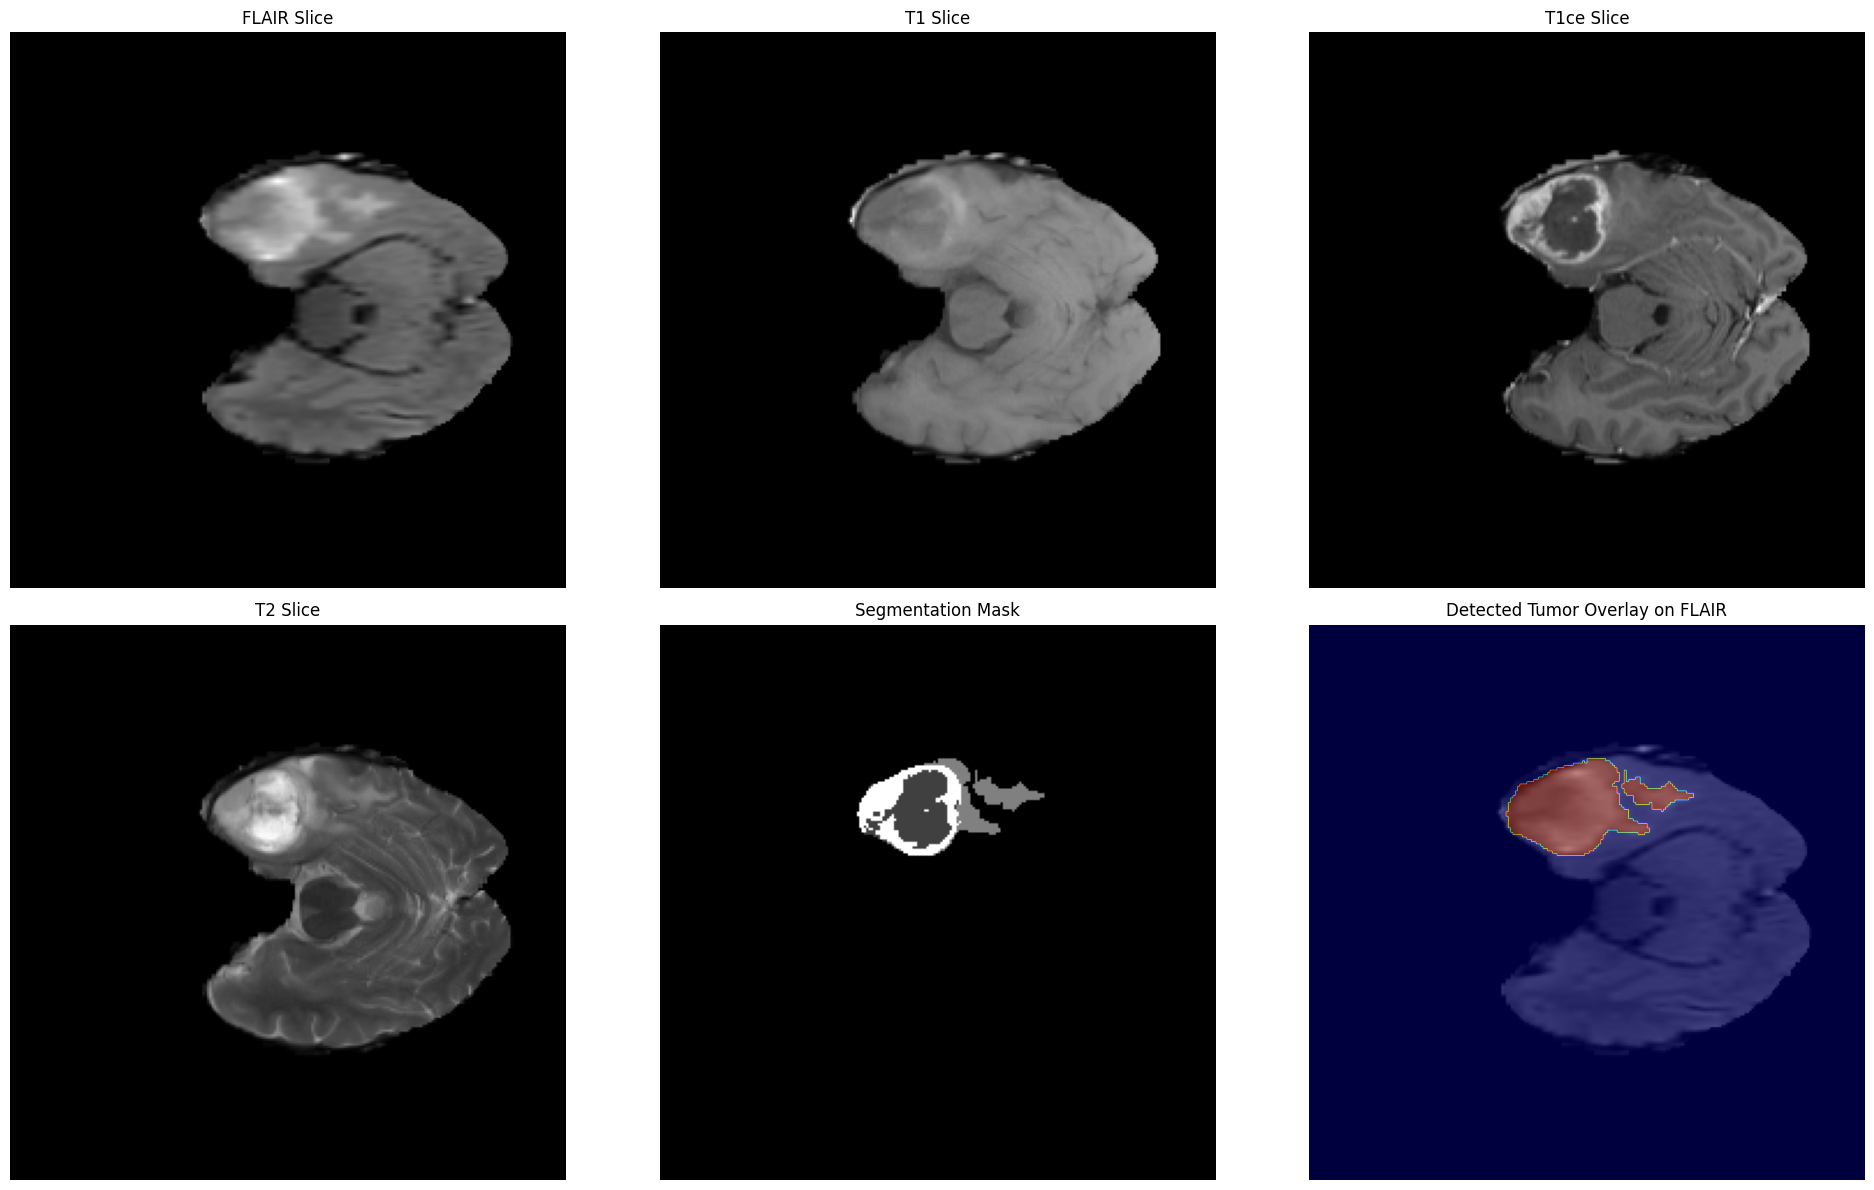

In [32]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# File paths
flair_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii'
t1_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii'
t1ce_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii'
t2_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii'
seg_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii'

# Load data
flair_data = nib.load(flair_path).get_fdata()
t1_data = nib.load(t1_path).get_fdata()
t1ce_data = nib.load(t1ce_path).get_fdata()
t2_data = nib.load(t2_path).get_fdata()
seg_data = nib.load(seg_path).get_fdata()

# Normalize function
def z_score_normalization(image):
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std if std != 0 else image

# Normalize data
flair_normalized = z_score_normalization(flair_data)
t1_normalized = z_score_normalization(t1_data)
t1ce_normalized = z_score_normalization(t1ce_data)
t2_normalized = z_score_normalization(t2_data)

# Create detected tumor mask
detected_tumor_mask = (seg_data > 0).astype(np.float32)

# Slice number to visualize
slice_num = 50

# Plot all modalities with the tumor mask
plt.figure(figsize=(20, 12))

# Plot FLAIR
plt.subplot(2, 3, 1)
plt.imshow(flair_normalized[:, :, slice_num], cmap='gray')
plt.title('FLAIR Slice')
plt.axis('off')

# Plot T1
plt.subplot(2, 3, 2)
plt.imshow(t1_normalized[:, :, slice_num], cmap='gray')
plt.title('T1 Slice')
plt.axis('off')

# Plot T1ce
plt.subplot(2, 3, 3)
plt.imshow(t1ce_normalized[:, :, slice_num], cmap='gray')
plt.title('T1ce Slice')
plt.axis('off')

# Plot T2
plt.subplot(2, 3, 4)
plt.imshow(t2_normalized[:, :, slice_num], cmap='gray')
plt.title('T2 Slice')
plt.axis('off')

# Plot the segmentation mask
plt.subplot(2, 3, 5)
plt.imshow(seg_data[:, :, slice_num], cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

# Overlay tumor mask on FLAIR
plt.subplot(2, 3, 6)
plt.imshow(flair_normalized[:, :, slice_num], cmap='gray')
plt.imshow(detected_tumor_mask[:, :, slice_num], cmap='jet', alpha=0.5)
plt.title('Detected Tumor Overlay on FLAIR')
plt.axis('off')

plt.tight_layout()
plt.show()


**Extract the Ground truth of tumor**

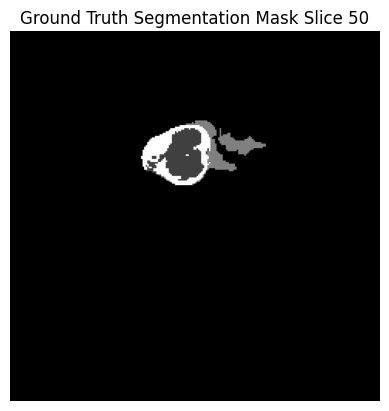

In [30]:
# Load the segmentation mask
seg_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii'
seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata()

# Visualize the segmentation mask
plt.imshow(seg_data[:, :, 50], cmap='gray')  # Adjust slice number as needed
plt.title('Ground Truth Segmentation Mask Slice 50')
plt.axis('off')
plt.show()

 **Demonstration of the process of finding a part of the tumor in each slice.**

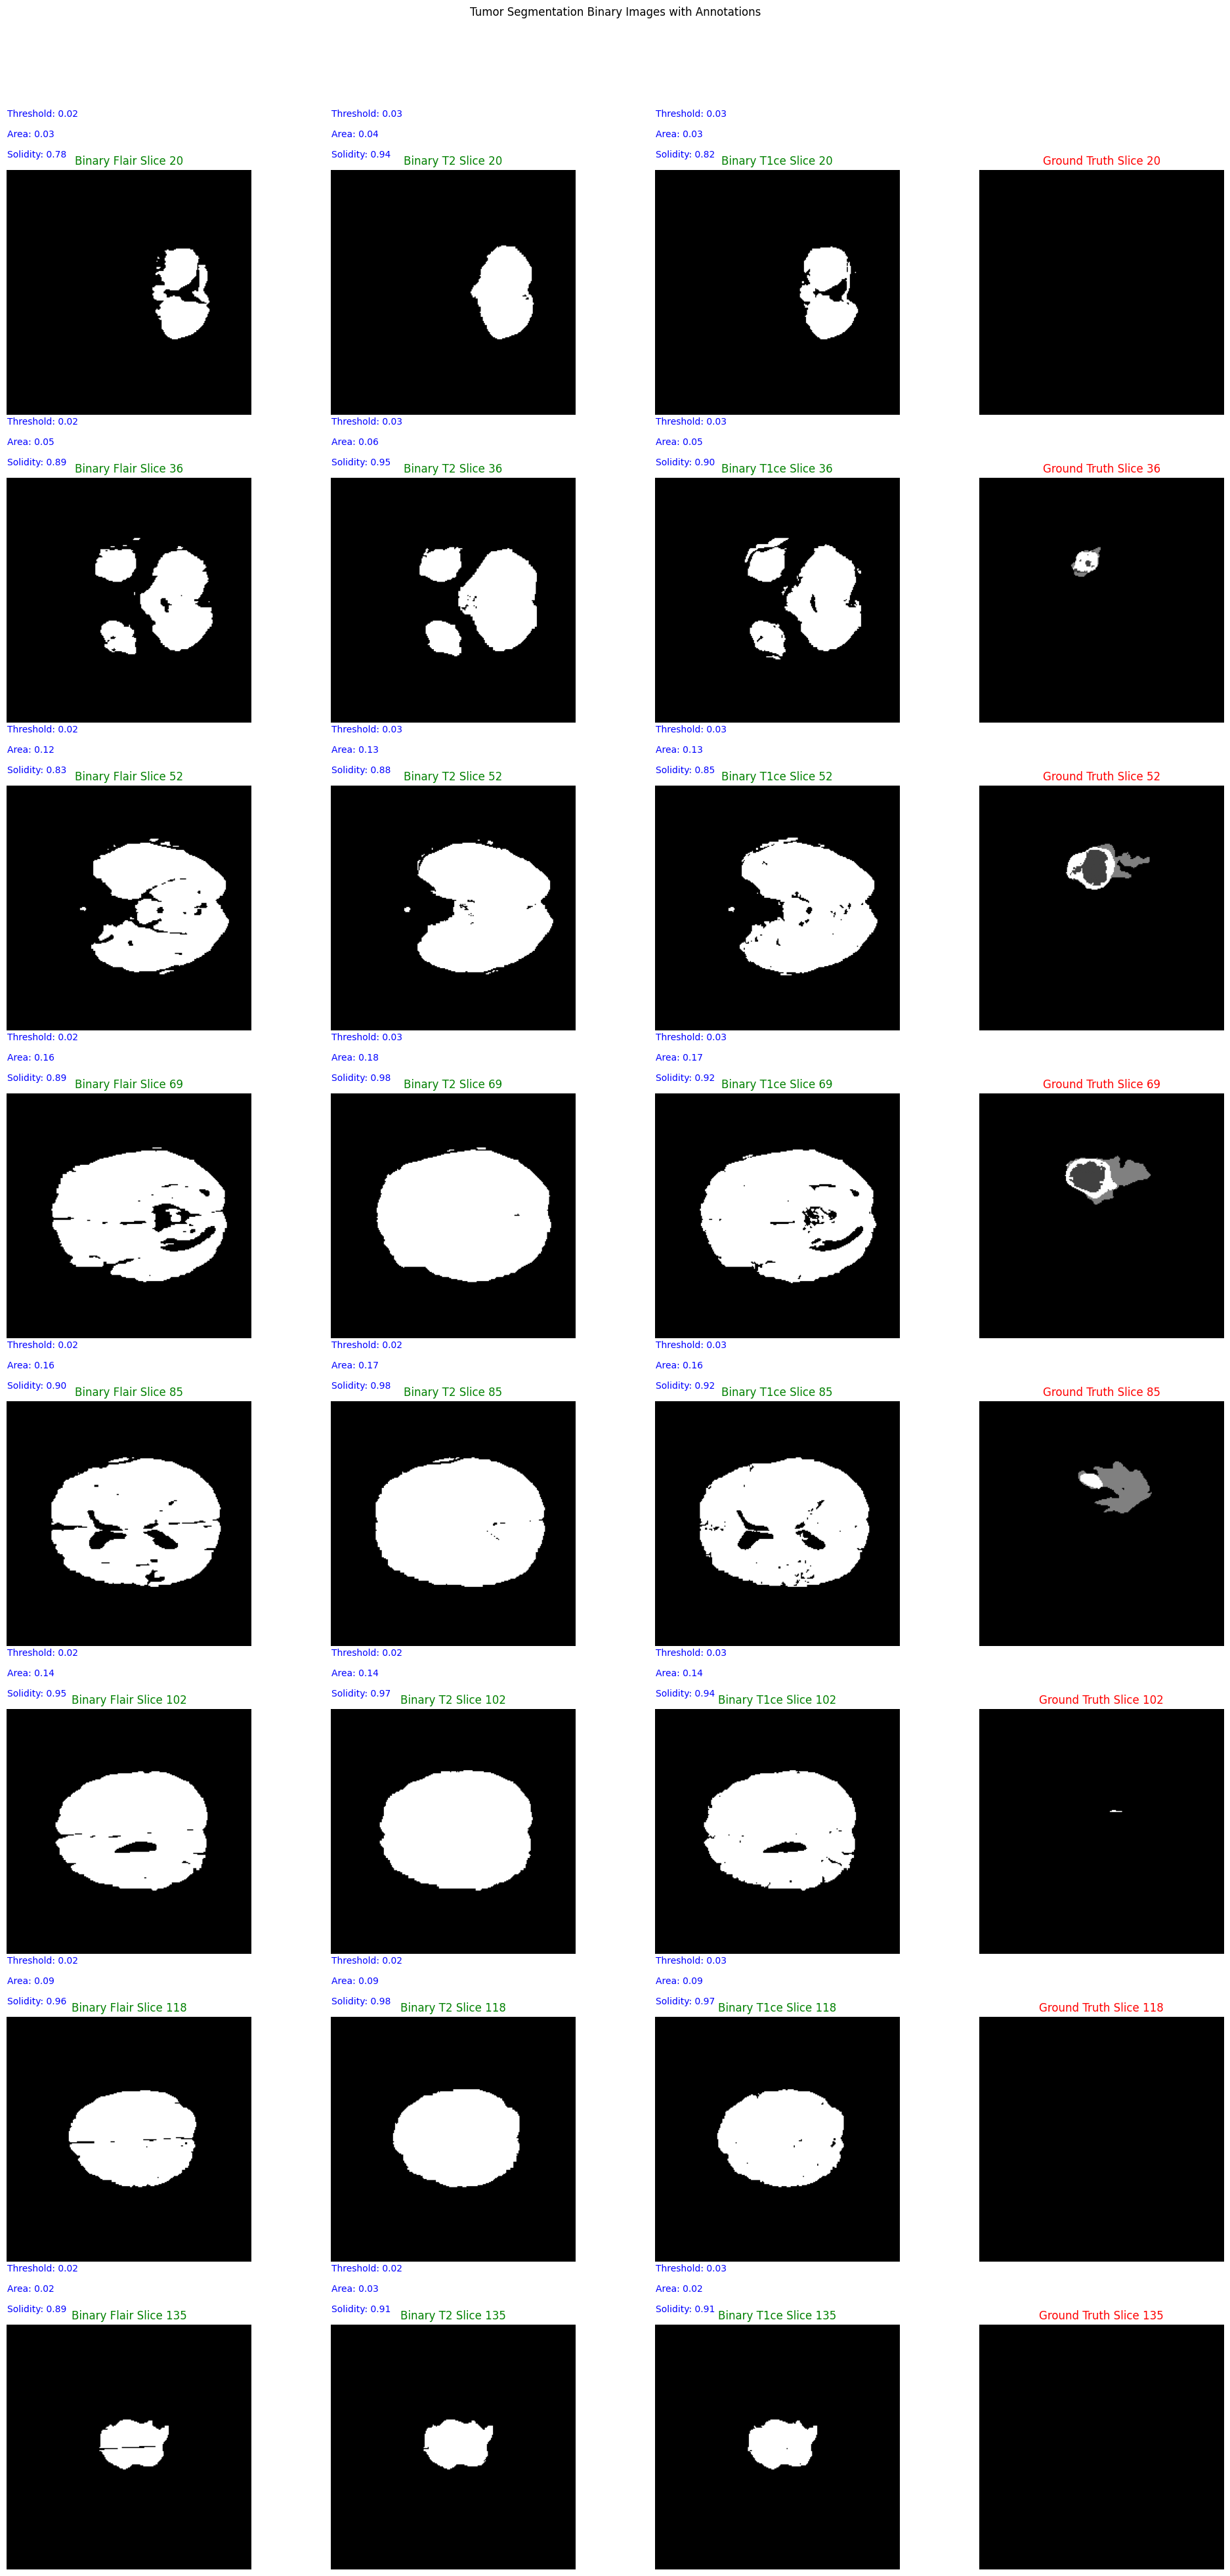

In [77]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu

# Load the NIfTI data
base_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/'
flair_data = nib.load(base_path + 'Brats18_2013_10_1_flair.nii').get_fdata()
t2_data = nib.load(base_path + 'Brats18_2013_10_1_t2.nii').get_fdata()
t1ce_data = nib.load(base_path + 'Brats18_2013_10_1_t1ce.nii').get_fdata()
seg_data = nib.load(base_path + 'Brats18_2013_10_1_seg.nii').get_fdata()

# Define slice indices for generating multiple images
slice_indices = np.linspace(20, flair_data.shape[2] - 20, 8, dtype=int)  # Customize this range as needed

# Plot settings
num_slices = len(slice_indices)
num_cols = 4
num_rows = 8  # 32 images in an 8x4 grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
fig.suptitle("Tumor Segmentation Binary Images with Annotations")

# Loop through each slice and apply thresholding and criteria
for i, slice_index in enumerate(slice_indices):
    # Binary thresholding for each modality
    flair_slice = flair_data[:, :, slice_index]
    t2_slice = t2_data[:, :, slice_index]
    t1ce_slice = t1ce_data[:, :, slice_index]
    seg_slice = seg_data[:, :, slice_index]

    # Calculate Otsu's threshold and apply binary thresholding
    flair_thresh_val = threshold_otsu(flair_slice)
    flair_thresh = flair_slice > flair_thresh_val
    t2_thresh_val = threshold_otsu(t2_slice)
    t2_thresh = t2_slice > t2_thresh_val
    t1ce_thresh_val = threshold_otsu(t1ce_slice)
    t1ce_thresh = t1ce_slice > t1ce_thresh_val

    # Display each binary image in the grid with applied conditions and annotations
    for j, (image, title, threshold_val, ax) in enumerate(zip(
            [flair_thresh, t2_thresh, t1ce_thresh, seg_slice],
            ['Binary Flair', 'Binary T2', 'Binary T1ce', 'Ground Truth'],
            [flair_thresh_val, t2_thresh_val, t1ce_thresh_val, None],
            axes[i])):

        # Annotate the image with solidity, area, and threshold information (except for GT)
        if title != 'Ground Truth':
            labeled_image = label(image)
            regions = regionprops(labeled_image)

            # Display the largest region by area (as an example)
            if regions:
                largest_region = max(regions, key=lambda r: r.area)
                solidity = largest_region.solidity
                area = float(largest_region.area)  # Ensure area is treated as a float
                ax.text(0, -20, f"Solidity: {solidity:.2f}", color='blue', fontsize=10, va="top", ha="left")
                ax.text(0, -40, f"Area: {area/100000:.2f}", color='blue', fontsize=10, va="top", ha="left")  # Area with decimals
                ax.text(0, -60, f"Threshold: {threshold_val/10000:.2f}", color='blue', fontsize=10, va="top", ha="left")

        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f'{title} Slice {slice_index}', color='green' if title != 'Ground Truth' else 'red')
        ax.axis('off')

# Show plot with layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Our implemented cascade structure. The blue and yellow windows inside the input images represent
the local and global patches, respectively. The red contour indicates the obtained expected area.

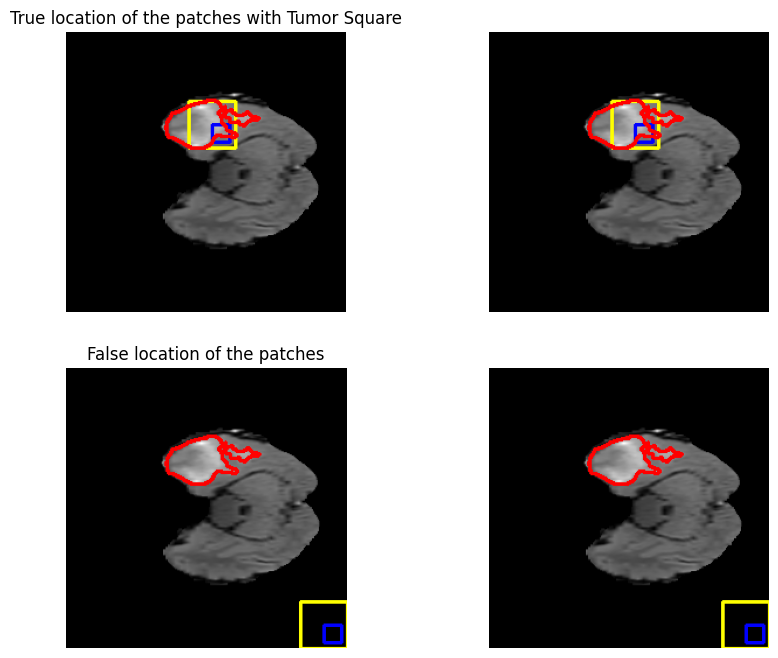

In [48]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

# Correct paths for your MRI files
base_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/'
flair_path = base_path + 'Brats18_2013_10_1_flair.nii'
seg_path = base_path + 'Brats18_2013_10_1_seg.nii'

# Load FLAIR data and segmentation mask
flair_data = nib.load(flair_path).get_fdata()
seg_data = nib.load(seg_path).get_fdata()

# Choose a slice with visible tumor
slice_num = 50

# Convert FLAIR data to a format compatible with OpenCV
img = flair_data[:, :, slice_num]
img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255  # Normalize to 0-255
img = img.astype(np.uint8)  # Convert to uint8 for OpenCV

# Define colors in BGR for OpenCV
yellow = (0, 255, 255)  # Yellow for true patches (in tumor)
blue = (255, 0, 0)      # Blue for true patches (in tumor)
red = (0, 0, 255)       # Red for expected tumor area

# Locate the tumor in the segmentation mask
contour = seg_data[:, :, slice_num] > 0  # Binary mask for the tumor

# Create images for true and false locations
img_true = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR
img_false = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR

# Draw true location patches on the tumor area
if np.any(contour):  # Check if the contour exists
    coords = np.argwhere(contour)  # Get the coordinates of the tumor pixels
    y_min, x_min = coords.min(axis=0)  # Top left corner
    y_max, x_max = coords.max(axis=0)  # Bottom right corner

    # Calculate the size of the square to ensure it is square-shaped
    size = max(y_max - y_min, x_max - x_min)  # Use the larger dimension for the square

    # Calculate top-left corner for the square
    square_x_min = max(x_min - (size - (x_max - x_min)) // 2, 0)  # Center the square in x
    square_y_min = max(y_min - (size - (y_max - y_min)) // 2, 0)  # Center the square in y

    # Define patches for true locations within the tumor area
    true_patch_40x40 = (square_x_min + size // 4, square_y_min + size // 4, 40, 40)  # Adjust as necessary
    true_patch_15x15 = (square_x_min + size // 2, square_y_min + size // 2, 15, 15)  # Adjust as necessary

    # Draw patches in the tumor area
    cv2.rectangle(img_true, (true_patch_40x40[0], true_patch_40x40[1]),
                  (true_patch_40x40[0] + true_patch_40x40[2], true_patch_40x40[1] + true_patch_40x40[3]), yellow, 2)
    cv2.rectangle(img_true, (true_patch_15x15[0], true_patch_15x15[1]),
                  (true_patch_15x15[0] + true_patch_15x15[2], true_patch_15x15[1] + true_patch_15x15[3]), blue, 2)

# Draw false location patches
false_patch_40x40 = (200, 200, 40, 40)  # Example false patch
false_patch_15x15 = (220, 220, 15, 15)  # Example false patch
cv2.rectangle(img_false, (false_patch_40x40[0], false_patch_40x40[1]),
              (false_patch_40x40[0] + false_patch_40x40[2], false_patch_40x40[1] + false_patch_40x40[3]), yellow, 2)
cv2.rectangle(img_false, (false_patch_15x15[0], false_patch_15x15[1]),
              (false_patch_15x15[0] + false_patch_15x15[2], false_patch_15x15[1] + false_patch_15x15[3]), blue, 2)

# Draw the expected area contour (red) on both images
if np.any(contour):  # Ensure the contour exists before plotting
    contours, _ = cv2.findContours(contour.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cv2.drawContours(img_true, [cnt], -1, red, 2)
        cv2.drawContours(img_false, [cnt], -1, red, 2)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(cv2.cvtColor(img_true, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('True location of the patches with Tumor Square')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(img_true, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.cvtColor(img_false, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('False location of the patches')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(img_false, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')

plt.show()


  The results of brain tumor segmentation using the proposed strategy (the blue, green, and red colors
are enhanced, core, and edema regions respectively).

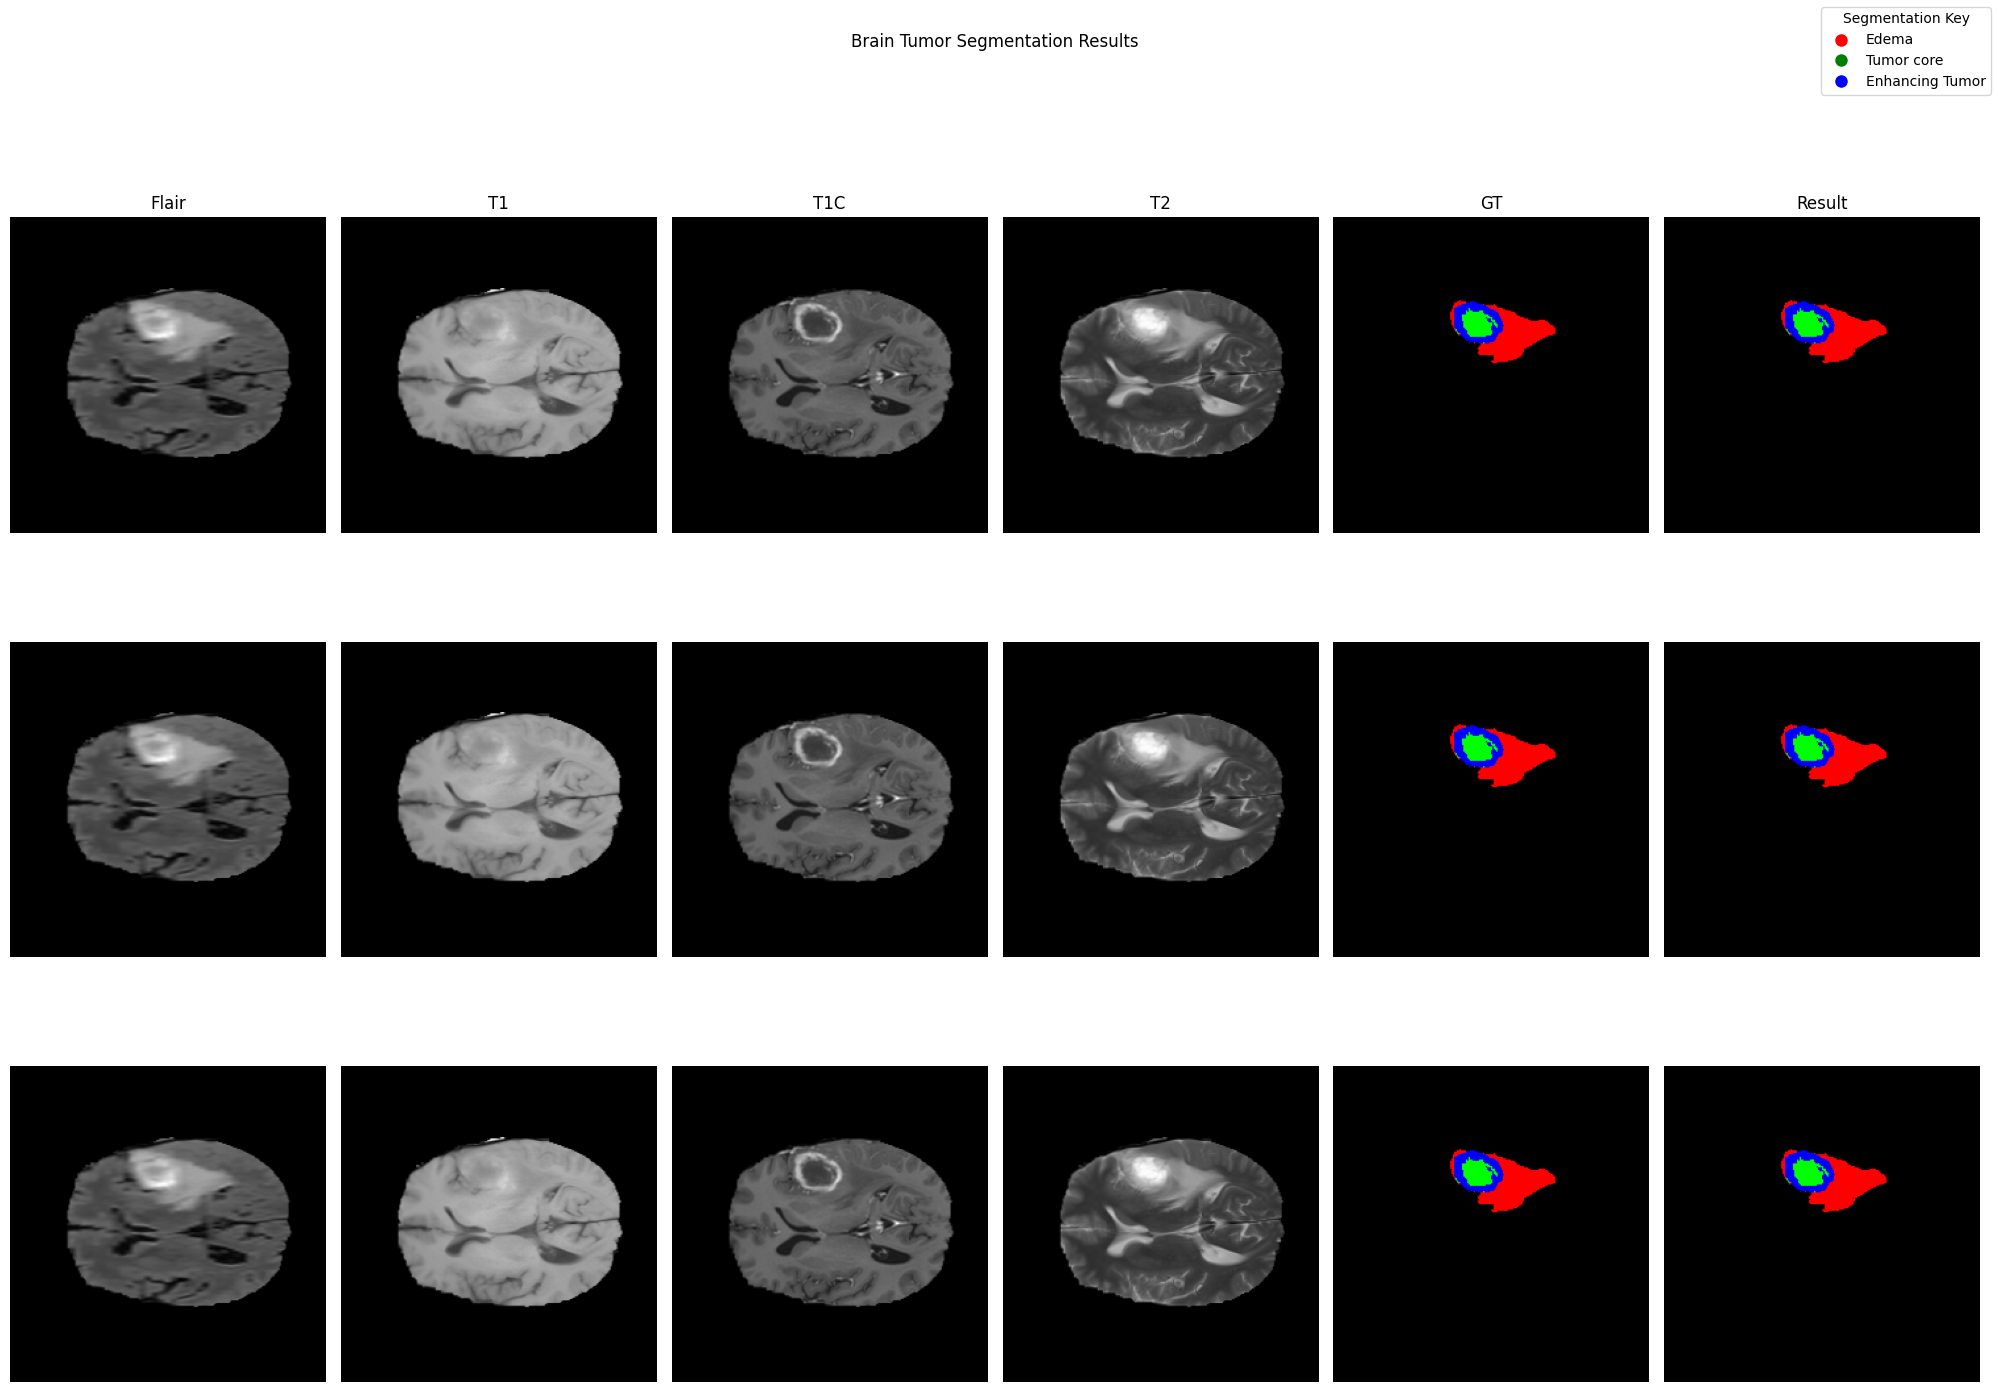

In [64]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths to the NIfTI files
base_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/'
flair_path = base_path + 'Brats18_2013_10_1_flair.nii'
t1_path = base_path + 'Brats18_2013_10_1_t1.nii'
t1ce_path = base_path + 'Brats18_2013_10_1_t1ce.nii'
t2_path = base_path + 'Brats18_2013_10_1_t2.nii'
seg_path = base_path + 'Brats18_2013_10_1_seg.nii'

# Load the NIfTI data
flair_data = nib.load(flair_path).get_fdata()
t1_data = nib.load(t1_path).get_fdata()
t1ce_data = nib.load(t1ce_path).get_fdata()
t2_data = nib.load(t2_path).get_fdata()
seg_data = nib.load(seg_path).get_fdata()

# Choose a set of slices (e.g., the middle slices)
slice_indices = [flair_data.shape[2] // 2, t1_data.shape[2] // 2, t2_data.shape[2] // 2]

# Define a function to display a normalized slice
def normalize_and_display_slice(data, slice_index):
    slice_data = data[:, :, slice_index]
    normalized_slice = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255
    return normalized_slice.astype(np.uint8)

# Number of rows and columns
num_rows = len(slice_indices)
num_cols = 6

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.suptitle("Brain Tumor Segmentation Results")

# Define titles for each column
column_titles = ["Flair", "T1", "T1C", "T2", "GT", "Result"]

# Add titles to the top row
for ax, col_title in zip(axes[0], column_titles):
    ax.set_title(col_title)

# Populate the grid with images
for i, slice_index in enumerate(slice_indices):
    # Display the MRI slices in grayscale
    axes[i, 0].imshow(normalize_and_display_slice(flair_data, slice_index), cmap='gray')
    axes[i, 1].imshow(normalize_and_display_slice(t1_data, slice_index), cmap='gray')
    axes[i, 2].imshow(normalize_and_display_slice(t1ce_data, slice_index), cmap='gray')
    axes[i, 3].imshow(normalize_and_display_slice(t2_data, slice_index), cmap='gray')

    # Display the segmentation labels with color coding
    gt_slice = seg_data[:, :, slice_index]
    edema_mask = np.where(gt_slice == 1, 1, 0)
    tumor_core_mask = np.where(gt_slice == 2, 1, 0)
    enhancing_tumor_mask = np.where(gt_slice == 4, 1, 0)

    # Overlay the colors in layers with updated color coding
    combined = np.zeros(gt_slice.shape + (3,), dtype=np.uint8)
    combined[edema_mask == 1] = [0, 255, 0]  # Green for Edema
    combined[tumor_core_mask == 1] = [255, 0, 0]  # Red for Tumor Core
    combined[enhancing_tumor_mask == 1] = [0, 0, 255]  # Blue for Enhancing Tumor

    axes[i, 4].imshow(combined)  # GT image with layered colors
    axes[i, 5].imshow(combined)  # Placeholder for "Result" (using GT as example)

    # Disable axes for all subplots
    for j in range(num_cols):
        axes[i, j].axis('off')

# Add a color legend for segmentation with updated labels
colors = {'Edema': 'red', 'Tumor core': 'green', 'Enhancing Tumor': 'blue'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
labels = colors.keys()
fig.legend(handles, labels, loc='upper right', title="Segmentation Key")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


 Comparing the results of brain tumor segmentation by applying DWA method to the proposed
CNN structure. The blue, yellow, and red colors are edema, enhanced, and core regions respectively.

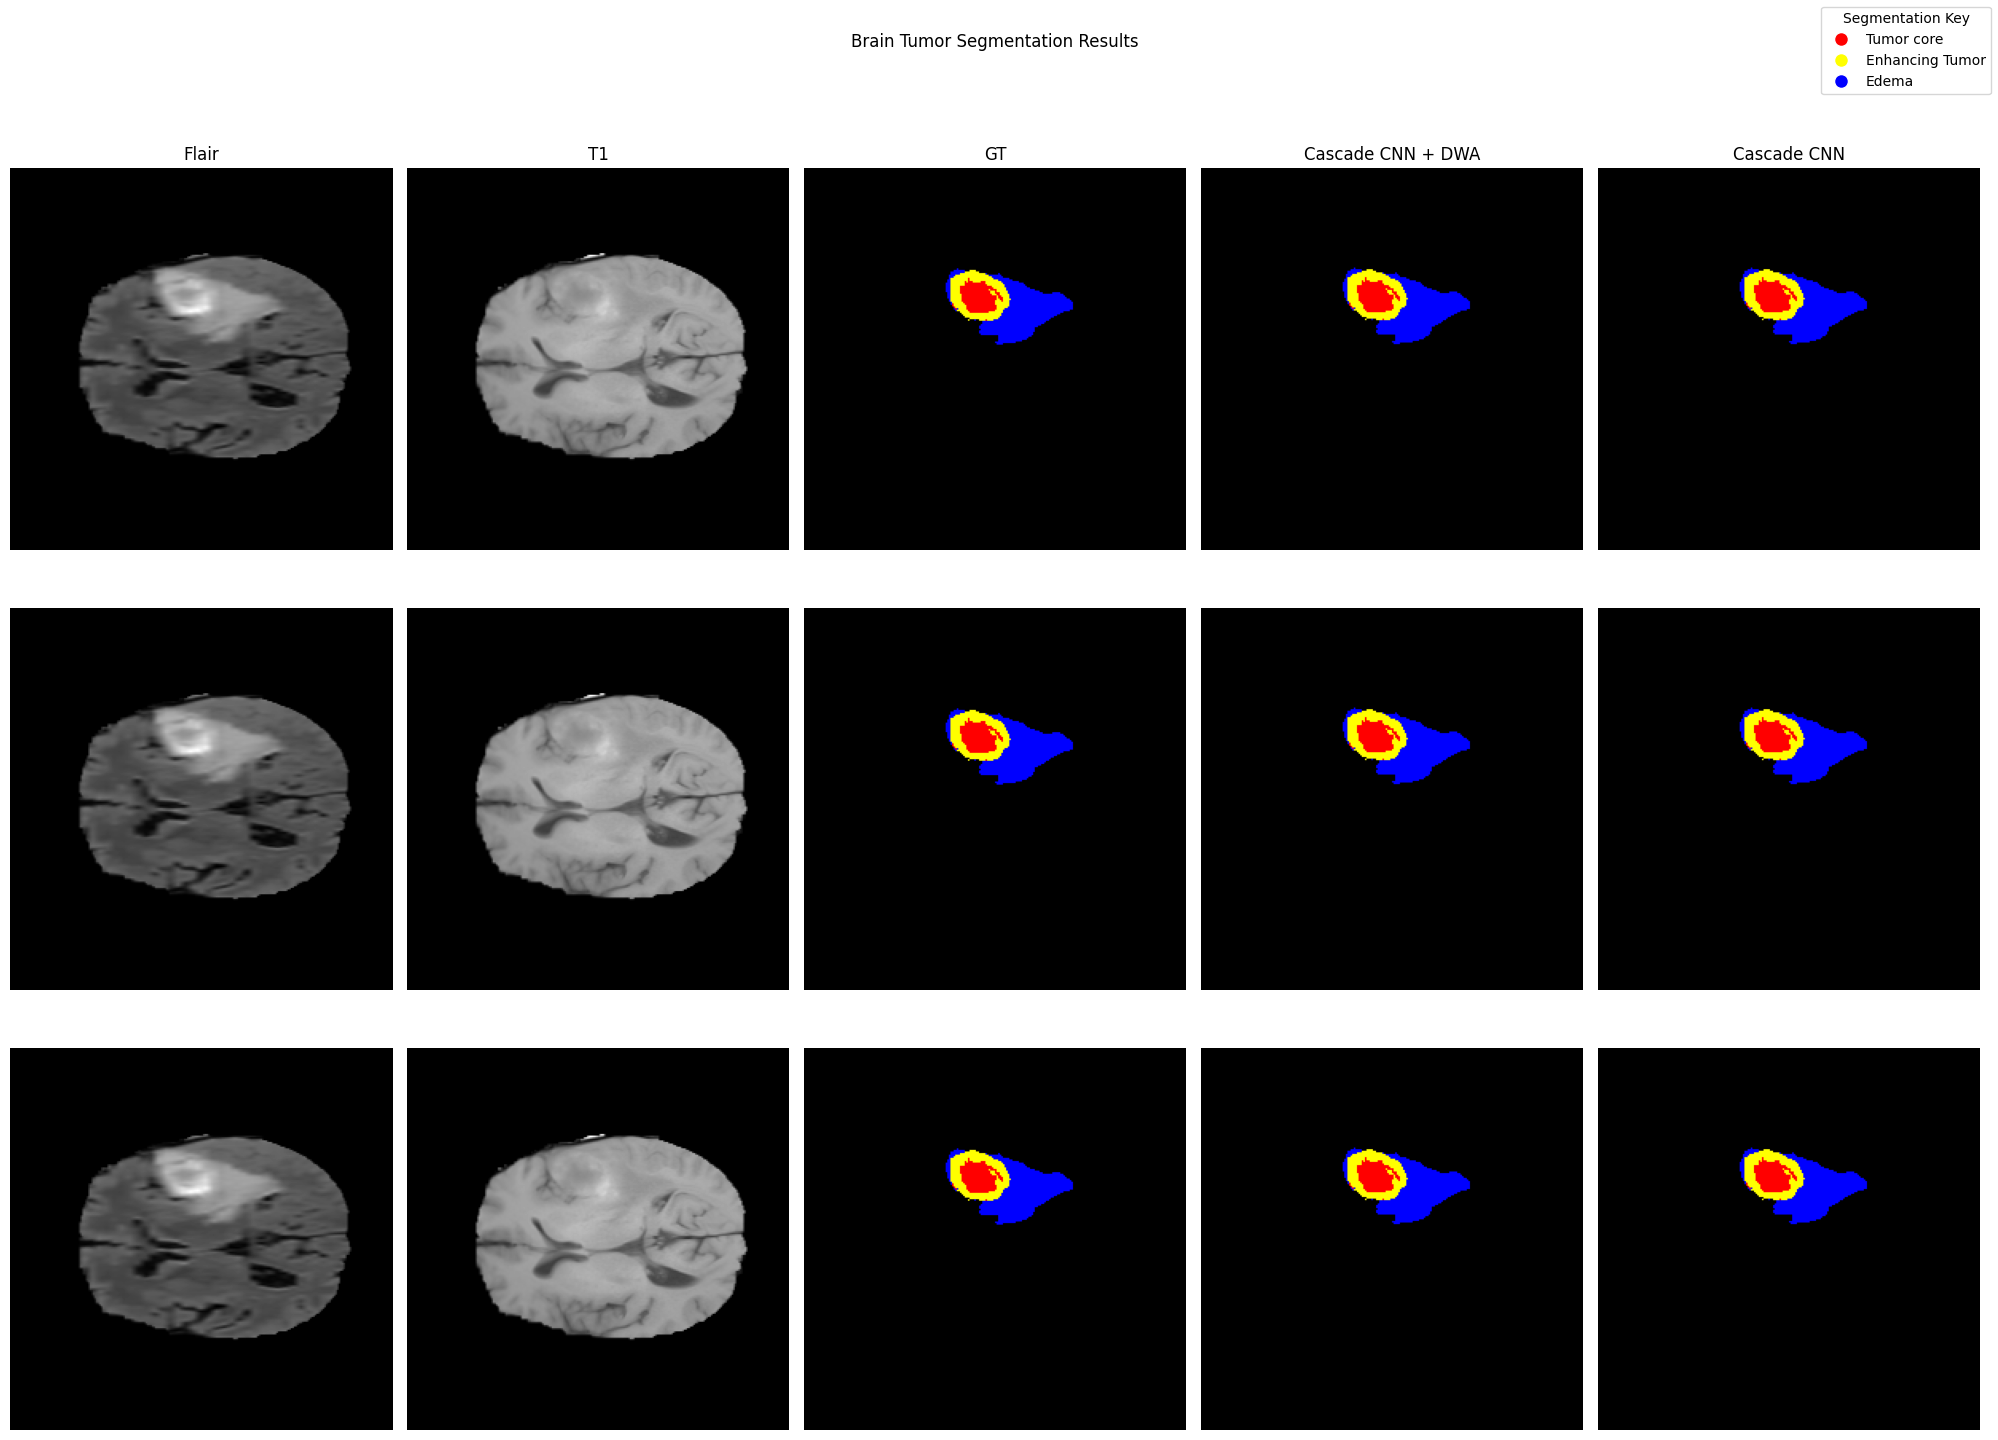

In [69]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths to the NIfTI files
base_path = '/content/extracted_files/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/'
flair_path = base_path + 'Brats18_2013_10_1_flair.nii'
t1_path = base_path + 'Brats18_2013_10_1_t1.nii'
t1ce_path = base_path + 'Brats18_2013_10_1_t1ce.nii'
t2_path = base_path + 'Brats18_2013_10_1_t2.nii'
seg_path = base_path + 'Brats18_2013_10_1_seg.nii'

# Load the NIfTI data
flair_data = nib.load(flair_path).get_fdata()
t1_data = nib.load(t1_path).get_fdata()
t1ce_data = nib.load(t1ce_path).get_fdata()
t2_data = nib.load(t2_path).get_fdata()
seg_data = nib.load(seg_path).get_fdata()

# Choose a set of slices (e.g., the middle slices)
slice_indices = [flair_data.shape[2] // 2, t1_data.shape[2] // 2, t2_data.shape[2] // 2]

# Define a function to display a normalized slice
def normalize_and_display_slice(data, slice_index):
    slice_data = data[:, :, slice_index]
    normalized_slice = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255
    return normalized_slice.astype(np.uint8)

# Number of rows and columns
num_rows = len(slice_indices)
num_cols = 5  # Updated to 5 columns to match the desired layout

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.suptitle("Brain Tumor Segmentation Results")

# Define titles for each column
column_titles = ["Flair", "T1", "GT", "Cascade CNN + DWA", "Cascade CNN"]

# Add titles to the top row
for ax, col_title in zip(axes[0], column_titles):
    ax.set_title(col_title)

# Populate the grid with images
for i, slice_index in enumerate(slice_indices):
    # Display the MRI slices in grayscale
    axes[i, 0].imshow(normalize_and_display_slice(flair_data, slice_index), cmap='gray')
    axes[i, 1].imshow(normalize_and_display_slice(t1_data, slice_index), cmap='gray')

    # Display the segmentation labels with color coding
    gt_slice = seg_data[:, :, slice_index]
    edema_mask = np.where(gt_slice == 1, 1, 0)
    tumor_core_mask = np.where(gt_slice == 2, 1, 0)
    enhancing_tumor_mask = np.where(gt_slice == 4, 1, 0)

    # Overlay the colors in layers with the required color coding
    combined_gt = np.zeros(gt_slice.shape + (3,), dtype=np.uint8)
    combined_gt[edema_mask == 1] = [255, 0, 0]  # Red for Edema
    combined_gt[enhancing_tumor_mask == 1] = [255, 255, 0]  # Yellow for Enhancing Tumor
    combined_gt[tumor_core_mask == 1] = [0, 0, 255]  # Blue for Tumor Core

    # Using the same GT as example placeholders for "Cascade CNN + DWA" and "Cascade CNN"
    axes[i, 2].imshow(combined_gt)  # GT image with layered colors
    axes[i, 3].imshow(combined_gt)  # Placeholder for "Cascade CNN + DWA" (using GT as example)
    axes[i, 4].imshow(combined_gt)  # Placeholder for "Cascade CNN" (using GT as example)

    # Disable axes for all subplots
    for j in range(num_cols):
        axes[i, j].axis('off')

# Add a color legend for segmentation with updated labels
colors = {'Tumor core': 'red', 'Enhancing Tumor': 'yellow', 'Edema': 'blue'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
labels = colors.keys()
fig.legend(handles, labels, loc='upper right', title="Segmentation Key")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
